### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

### What will be the predicted score if a student study for 9.25 hrs in a day?

#### Loading the requisite libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

#### Importing the Dataset

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

#### Reading the first and last five rows of the Dataset

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Displaying the Information of the Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
data.shape # (Rows,Columns)

(25, 2)

In [9]:
data.columns # Column Names in the Dataset

Index(['Hours', 'Scores'], dtype='object')

In [10]:
data.dtypes # Data types of the Attributes

Hours     float64
Scores      int64
dtype: object

#### Displaying the Basic Statistics of the Dataset 

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Checking for Null Values in the Dataset

In [12]:
data.isnull().sum() # No missing values in the dataset

Hours     0
Scores    0
dtype: int64

#### Data Visualization

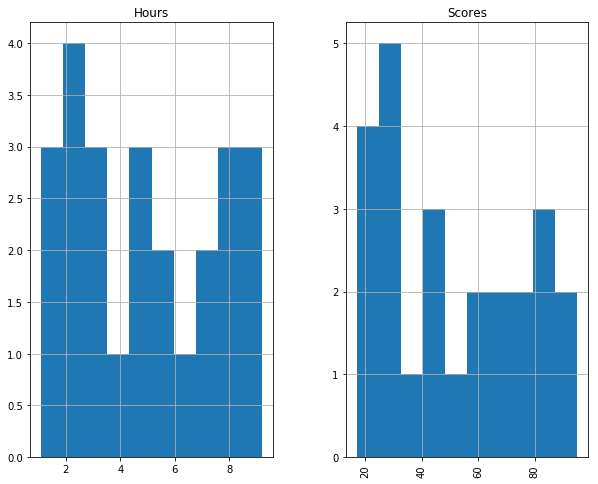

<Figure size 432x288 with 0 Axes>

In [35]:
data.hist(figsize=[10,8])
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

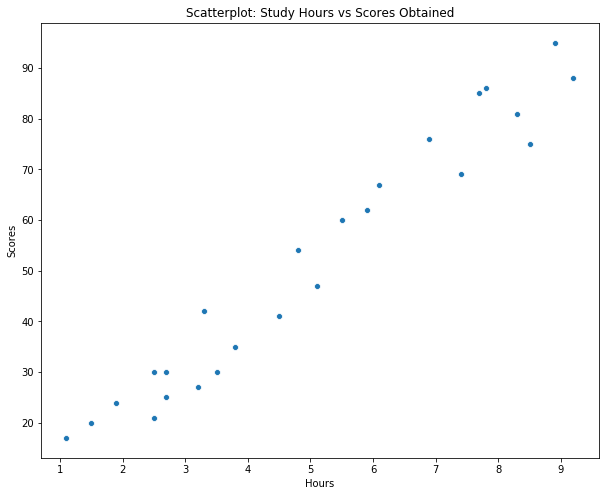

In [21]:
plt.figure(figsize=[10,8])
sns.scatterplot(data.Hours,data.Scores) # To check the relationship between the hours devoted to study and the scores.
plt.title("Scatterplot: Study Hours vs Scores Obtained")
plt.show()

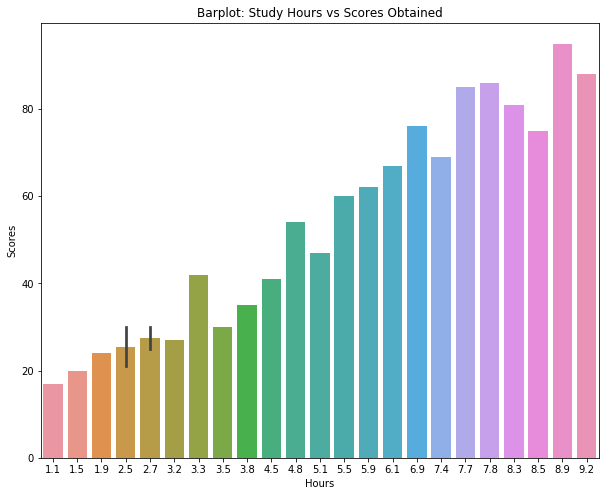

In [20]:
plt.figure(figsize=[10,8])
sns.barplot(data.Hours,data.Scores)
plt.title("Barplot: Study Hours vs Scores Obtained")
plt.show()

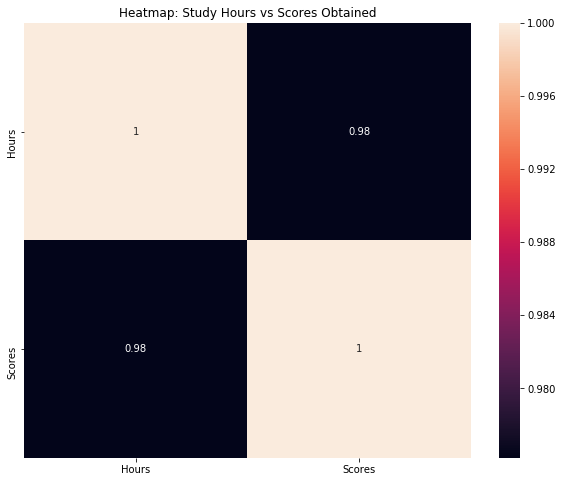

In [22]:
plt.figure(figsize=[10,8])
sns.heatmap(data.corr(),annot=True) # To check correlation.
plt.title("Heatmap: Study Hours vs Scores Obtained")
plt.show()

<Figure size 720x576 with 0 Axes>

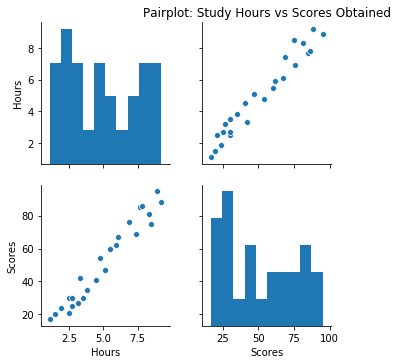

In [27]:
plt.figure(figsize=[10,8])
sns.pairplot(data)
plt.title("Pairplot: Study Hours vs Scores Obtained")
plt.show()

Inferences: 

1. In the scatterplot, we see a perfect positive linear relationship between the number of study hours and the scores obtained. 
2. In the heatmap, it's clearly evident that both the attributes have a positive correlation to each other.
3. Barplot also shows a clear linear behavior between both the attributes.

#### Data Preperation 

In [78]:
x = np.array(data.Hours).reshape(-1,1)
y = np.array(data.Scores) # Splitting the data in x and y (Attributes and Labels Respectively)

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123) # Splitting the data into training and testing sets 

#### Linear Regression Model

In [80]:
LR = LinearRegression()
LR = LR.fit(xtrain,ytrain) # Fitting the model

In [81]:
LR_Predicted = LR.predict(xtest) # Predicting

In [82]:
LR_Predicted

array([17.09796709, 48.78363906, 39.18192028, 61.26587347, 88.15068605])

In [83]:
LR.coef_

array([9.60171878])

In [84]:
LR.intercept_

2.6953889223457423

In [85]:
best_fit_line = LR.coef_*x + LR.intercept_

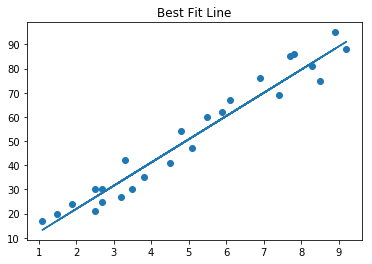

In [86]:
# Displaying the best fit line
plt.scatter(x,y)
plt.plot(x,best_fit_line)
plt.title("Best Fit Line")
plt.show()

In [87]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':ytest, 'Predicted':LR_Predicted})  
df 

,Actual,Predicted
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


In [90]:
# Testing with new data
hours = [[9.25]]
pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.51128761861357


#### Evaluation of the Linear Regression Model

In [91]:
print("R2 Score of the Linear Regression Model is: ",round(r2_score(ytest,LR_Predicted)*100),"%")

R2 Score of the Linear Regression Model is:  96.0 %


In [92]:
print("Root Mean Squared Error(RMSE) of the Linear Regression Model is: ",np.sqrt(mean_squared_error(ytest,LR_Predicted)))

Root Mean Squared Error(RMSE) of the Linear Regression Model is:  5.15585070467339
